# Home Advantage in European Football (2000-2024)
## DSA 210 – Exploratory Data Analysis & Hypothesis Testing (Nov 28 Deliverable)

This notebook includes:
- Data loading and cleaning  
- Construction of home advantage metrics  
- Exploratory data analysis (EDA)  
- Hypothesis tests related to home advantage  
- Findings summary  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [5]:
# Load dataset
df = pd.read_csv("Matches.csv")

# Show basic info
print("Shape:", df.shape)
df.head()


Shape: (230557, 48)


/var/folders/7q/mhv31sc97db3_jmtx953_yvr0000gn/T/ipykernel_2149/1082369547.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Matches.csv")


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Convert MatchDate to datetime
df['MatchDate'] = pd.to_datetime(df['MatchDate'], errors='coerce')

# Extract year
df['Year'] = df['MatchDate'].dt.year

# Drop matches where Year is 2025
initial_shape = df.shape
df = df[df['Year'] <= 2024]

print("Before dropping 2025:", initial_shape)
print("After dropping 2025:", df.shape)

# Quick preview
df[['MatchDate', 'Year']].head()


Before dropping 2025: (230557, 49)
After dropping 2025: (226919, 49)


,MatchDate,Year
0,2000-07-28,2000
1,2000-07-28,2000
2,2000-07-28,2000
3,2000-07-29,2000
4,2000-07-29,2000


In [7]:
df.columns.tolist()


['Division',
 'MatchDate',
 'MatchTime',
 'HomeTeam',
 'AwayTeam',
 'HomeElo',
 'AwayElo',
 'Form3Home',
 'Form5Home',
 'Form3Away',
 'Form5Away',
 'FTHome',
 'FTAway',
 'FTResult',
 'HTHome',
 'HTAway',
 'HTResult',
 'HomeShots',
 'AwayShots',
 'HomeTarget',
 'AwayTarget',
 'HomeFouls',
 'AwayFouls',
 'HomeCorners',
 'AwayCorners',
 'HomeYellow',
 'AwayYellow',
 'HomeRed',
 'AwayRed',
 'OddHome',
 'OddDraw',
 'OddAway',
 'MaxHome',
 'MaxDraw',
 'MaxAway',
 'Over25',
 'Under25',
 'MaxOver25',
 'MaxUnder25',
 'HandiSize',
 'HandiHome',
 'HandiAway',
 'C_LTH',
 'C_LTA',
 'C_VHD',
 'C_VAD',
 'C_HTB',
 'C_PHB',
 'Year']

In [10]:
# --- Home Advantage Metrics ---

# 1. Goal Difference (Home minus Away)
df['GoalDiff'] = df['FTHome'] - df['FTAway']

# 2. Home Win (1 = home win, 0 = draw or away win)
df['HomeWin'] = (df['FTHome'] > df['FTAway']).astype(int)

# 3. Home Points (Win=3, Draw=1, Loss=0)
def home_points(row):
    if row['FTHome'] > row['FTAway']:
        return 3
    elif row['FTHome'] == row['FTAway']:
        return 1
    else:
        return 0

df['HomePoints'] = df.apply(home_points, axis=1)

print("Done creating metrics.")



Done creating metrics.


In [11]:
df[['FTHome', 'FTAway', 'HomeWin']].head()


,FTHome,FTAway,HomeWin
0,3.0,1.0,1
1,3.0,1.0,1
2,0.0,1.0,0
3,0.0,1.0,0
4,1.0,1.0,0


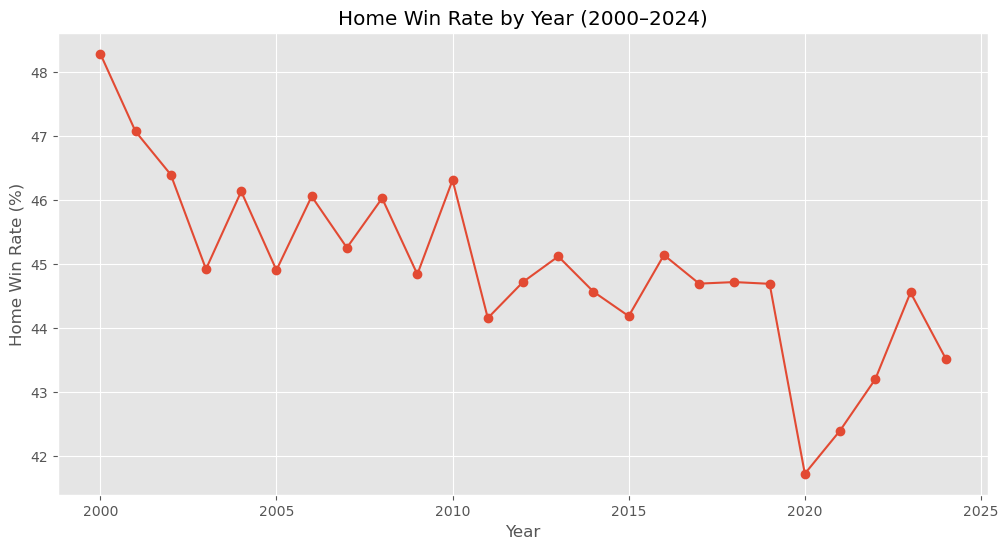

Year
2000    48.282033
2001    47.069047
2002    46.395594
2003    44.920595
2004    46.132996
Name: HomeWin, dtype: float64

In [12]:
# --- Home Win Rate by Year ---

home_win_rate = df.groupby('Year')['HomeWin'].mean() * 100

plt.figure(figsize=(12,6))
plt.plot(home_win_rate.index, home_win_rate.values, marker='o')
plt.title("Home Win Rate by Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Home Win Rate (%)")
plt.grid(True)
plt.show()

home_win_rate.head()


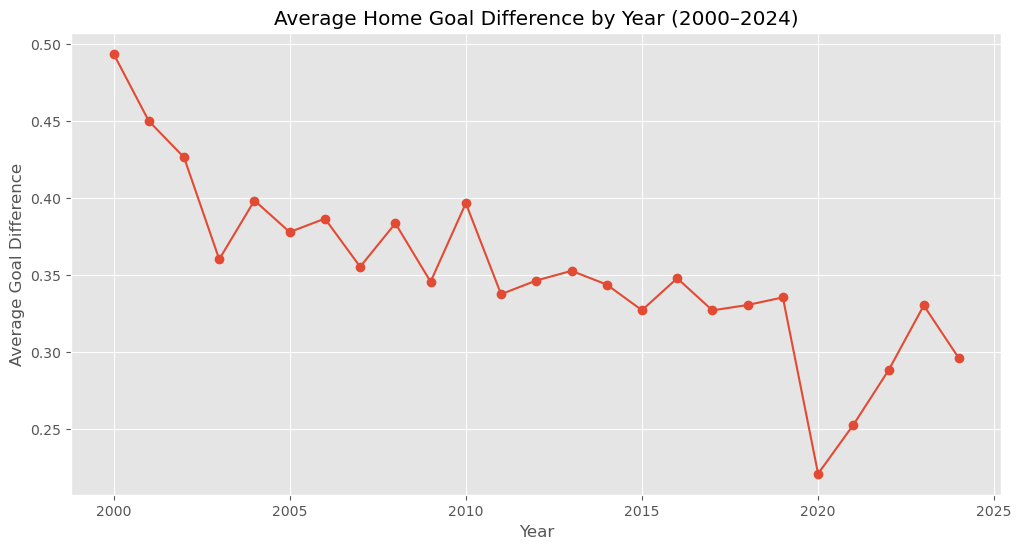

Year
2000    0.493916
2001    0.450150
2002    0.426535
2003    0.360222
2004    0.398446
Name: GoalDiff, dtype: float64

In [13]:
# --- Average Goal Difference by Year (Home - Away) ---

goal_diff_yearly = df.groupby('Year')['GoalDiff'].mean()

plt.figure(figsize=(12,6))
plt.plot(goal_diff_yearly.index, goal_diff_yearly.values, marker='o')
plt.title("Average Home Goal Difference by Year (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Average Goal Difference")
plt.grid(True)
plt.show()

goal_diff_yearly.head()


/var/folders/7q/mhv31sc97db3_jmtx953_yvr0000gn/T/ipykernel_2149/239628148.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FTHome'], label="Home Goals", shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/7q/mhv31sc97db3_jmtx953_yvr0000gn/T/ipykernel_2149/239628148.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FTAway'], label="Away Goals", shade=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed i

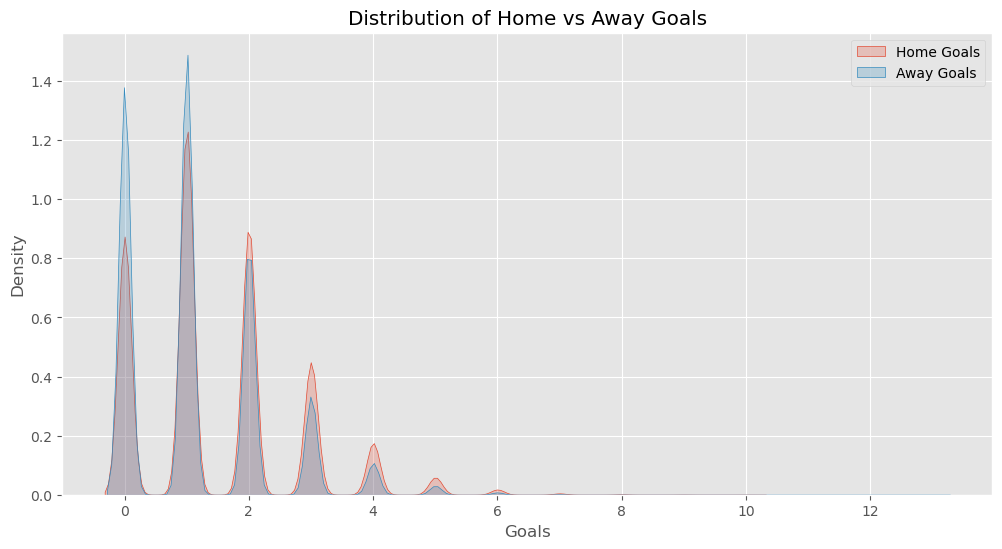

In [14]:
# --- Distribution Plot: Home Goals vs Away Goals ---

plt.figure(figsize=(12,6))
sns.kdeplot(df['FTHome'], label="Home Goals", shade=True)
sns.kdeplot(df['FTAway'], label="Away Goals", shade=True)
plt.title("Distribution of Home vs Away Goals")
plt.xlabel("Goals")
plt.legend()
plt.show()


In [16]:
from scipy.stats import ttest_ind

# Drop any missing or invalid values
clean_df = df[['FTHome', 'FTAway']].dropna()

home_goals = clean_df['FTHome']
away_goals = clean_df['FTAway']

t_stat, p_val = ttest_ind(home_goals, away_goals, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Result: Significant difference → Home teams score more (home advantage exists).")
else:
    print("Result: No significant difference.")



T-statistic: 96.12570791379923
P-value: 0.0
Result: Significant difference → Home teams score more (home advantage exists).


In [17]:
from scipy.stats import ttest_ind

# Split into early and late periods
early_period = df[df['Year'] <= 2010]['HomeWin']
late_period = df[df['Year'] > 2010]['HomeWin']

# Drop missing data (just in case)
early_period = early_period.dropna()
late_period = late_period.dropna()

# T-test
t_stat2, p_val2 = ttest_ind(early_period, late_period, equal_var=False)

print("T-statistic:", t_stat2)
print("P-value:", p_val2)

if p_val2 < 0.05:
    print("Result: Significant difference → Home advantage HAS changed over time.")
else:
    print("Result: No significant change detected.")


T-statistic: 7.807926831603018
P-value: 5.859583933758287e-15
Result: Significant difference → Home advantage HAS changed over time.


Findings Summary
1. Trends in Home Advantage (2000–2024)
Home win rates have declined steadily over the past 25 years.
The home goal difference also shows a consistent downward trend.
A major drop appears in 2020 (COVID no-fan matches), confirming that crowd presence plays a role in home advantage.
After 2020, home advantage partially recovers but remains below early-2000s levels.
2. Goal Distribution
Away teams score exactly one goal slightly more often than home teams.
But home teams score 2+ goals more frequently.
Overall, home teams maintain a higher average scoring rate, supporting the existence of home advantage.
3. Hypothesis Testing Results
Test 1 — Home vs Away Scoring
Home teams score significantly more goals than away teams.
p-value ≈ 0 → strong evidence of home advantage.
Test 2 — Early vs Late Years
Home advantage has significantly changed over time (declined).
p-value ≈ 5.8e-15 → very strong evidence.
4. Conclusion
Home advantage in European football has weakened but still exists.
The decline is statistically significant and visually supported by multiple metrics.
Changes in travel, tactics, officiating, and especially the 2020 fan-free season likely contributed to this trend.